# View HST COSMOS Dataset

The HST COSMOS training sample consists of:
1. **real_galaxy_catalog_25.2.fits** - Main catalog with source info and image references
2. **real_galaxy_catalog_25.2_fits.fits** - Morphological fit parameters
3. **real_galaxy_catalog_25.2_selection.fits** - Selection flags
4. **real_galaxy_images_25.2_n*.fits** - Galaxy postage stamps (89 files)
5. **real_galaxy_PSF_images_25.2_n*.fits** - PSF images (89 files)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
from astropy.table import Table
import warnings
warnings.filterwarnings('ignore')


CATALOG_DIR = '/data/bwedig/galsim_real_galaxies_hst_cosmos/COSMOS_25.2_training_sample'
MAIN_CATALOG = f'{CATALOG_DIR}/real_galaxy_catalog_25.2.fits'
FITS_CATALOG = f'{CATALOG_DIR}/real_galaxy_catalog_25.2_fits.fits'
SELECTION_CATALOG = f'{CATALOG_DIR}/real_galaxy_catalog_25.2_selection.fits'

In [2]:
main_cat = Table.read(MAIN_CATALOG)
main_cat.info()

<Table length=87798>
     name       dtype 
-------------- -------
         IDENT   int32
            RA float64
           DEC float64
           MAG float64
          BAND  bytes5
        WEIGHT float64
  GAL_FILENAME bytes32
  PSF_FILENAME bytes36
       GAL_HDU   int32
       PSF_HDU   int32
   PIXEL_SCALE float64
    NOISE_MEAN float64
NOISE_VARIANCE float64
NOISE_FILENAME bytes26
    stamp_flux float64


In [3]:
main_cat[:5]

IDENT,RA,DEC,MAG,BAND,WEIGHT,GAL_FILENAME,PSF_FILENAME,GAL_HDU,PSF_HDU,PIXEL_SCALE,NOISE_MEAN,NOISE_VARIANCE,NOISE_FILENAME,stamp_flux
int32,float64,float64,float64,bytes5,float64,bytes32,bytes36,int32,int32,float64,float64,float64,bytes26,float64
1286742,150.595594,2.336405,25.075000762939453,F814W,0.6505600214004517,real_galaxy_images_25.2_n1.fits,real_galaxy_PSF_images_25.2_n1.fits,0,0,0.029999999329447746,0.00014047599688638002,7.294449915207224e-06,acs_I_unrot_sci_20_cf.fits,2.164546006999444
782514,150.081357,1.941138,24.985000610351562,F814W,0.6535199880599976,real_galaxy_images_25.2_n1.fits,real_galaxy_PSF_images_25.2_n1.fits,1,1,0.029999999329447746,0.00011323999933665618,7.2192001425719354e-06,acs_I_unrot_sci_20_cf.fits,2.4019507448392687
52167,149.822621,2.028017,23.12700080871582,F814W,0.5832200050354004,real_galaxy_images_25.2_n1.fits,real_galaxy_PSF_images_25.2_n1.fits,2,2,0.029999999329447746,0.00015280400111805648,7.575360086775618e-06,acs_I_unrot_sci_20_cf.fits,14.4739104734781
70378,149.906413,1.752446,23.618000030517578,F814W,0.5859000086784363,real_galaxy_images_25.2_n1.fits,real_galaxy_PSF_images_25.2_n1.fits,3,3,0.029999999329447746,7.650309999007732e-05,6.068789843993727e-06,acs_I_unrot_sci_20_cf.fits,9.150407432214706
1108730,150.400003,1.685091,24.996999740600586,F814W,0.6396999955177307,real_galaxy_images_25.2_n1.fits,real_galaxy_PSF_images_25.2_n1.fits,4,4,0.029999999329447746,0.00013495900202542543,1.68645001394907e-05,acs_I_unrot_sci_20_cf.fits,2.1234505214742967


In [4]:
fits_cat = Table.read(FITS_CATALOG)
fits_cat.info()

<Table length=87798>
     name      dtype  shape    class     n_bad
------------- ------- ----- ------------ -----
        IDENT   int32             Column     0
     mag_auto float64             Column     0
  flux_radius float64             Column     0
        zphot float64             Column     0
    sersicfit float64  (8,)       Column     0
     bulgefit float64 (16,)       Column     0
   fit_status   int32  (5,)       Column     0
    fit_mad_s float64             Column     0
    fit_mad_b float64             Column     0
  fit_dvc_btt float64       MaskedColumn    10
 use_bulgefit   int32             Column     0
viable_sersic   int32             Column     0
          hlr float64  (3,)       Column     0
         flux float64  (4,)       Column     0


In [5]:
# SERSICFIT array structure
sersic_params = fits_cat['sersicfit'][0]
param_names = ['I (intensity)', 'R_1/2 (pixels)', 'n (Sersic index)', 
               'q (axis ratio)', 'boxiness', 'x0 (pixels)', 'y0 (pixels)', 
               'phi (radians)']
for i, (name, val) in enumerate(zip(param_names, sersic_params)):
    print(f"  [{i}] {name:25s}: {val:.6f}")

  [0] I (intensity)            : 0.013806
  [1] R_1/2 (pixels)           : 6.057366
  [2] n (Sersic index)         : 0.993942
  [3] q (axis ratio)           : 0.357846
  [4] boxiness                 : 0.000000
  [5] x0 (pixels)              : 102.850720
  [6] y0 (pixels)              : 102.555673
  [7] phi (radians)            : 0.727182


In [7]:
# BULGEFIT array structure
bulge_params = fits_cat['bulgefit'][0]
print("Disk component [0-7]:")
for i, (name, val) in enumerate(zip(param_names, bulge_params[:8])):
    print(f"  [{i}] {name:25s}: {val:.6f}")
print("Bulge component [8-15]:")
for i, (name, val) in enumerate(zip(param_names, bulge_params[8:])):
    print(f"  [{i+8}] {name:25s}: {val:.6f}")

Disk component [0-7]:
  [0] I (intensity)            : 0.013723
  [1] R_1/2 (pixels)           : 6.059097
  [2] n (Sersic index)         : 1.000000
  [3] q (axis ratio)           : 0.358107
  [4] boxiness                 : 0.000000
  [5] x0 (pixels)              : 102.847954
  [6] y0 (pixels)              : 102.554976
  [7] phi (radians)            : 0.727022
Bulge component [8-15]:
  [8] I (intensity)            : 0.000322
  [9] R_1/2 (pixels)           : 3.707228
  [10] n (Sersic index)         : 4.000000
  [11] q (axis ratio)           : 0.050000
  [12] boxiness                 : 0.000000
  [13] x0 (pixels)              : 102.847954
  [14] y0 (pixels)              : 102.554976
  [15] phi (radians)            : 0.826144


In [8]:
def load_galaxy_image(idx, catalog_dir=CATALOG_DIR):
    """
    Load galaxy and PSF images for a given index
    """
    gal_file = f"{catalog_dir}/{main_cat['GAL_FILENAME'][idx]}"
    psf_file = f"{catalog_dir}/{main_cat['PSF_FILENAME'][idx]}"
    gal_hdu = main_cat['GAL_HDU'][idx]
    psf_hdu = main_cat['PSF_HDU'][idx]
    
    try:
        with fits.open(gal_file) as hdul:
            gal_image = hdul[gal_hdu].data
        
        with fits.open(psf_file) as hdul:
            psf_image = hdul[psf_hdu].data
        
        return gal_image, psf_image
    except FileNotFoundError as e:
        print(f"Image file not found: {e}")
        return None, None

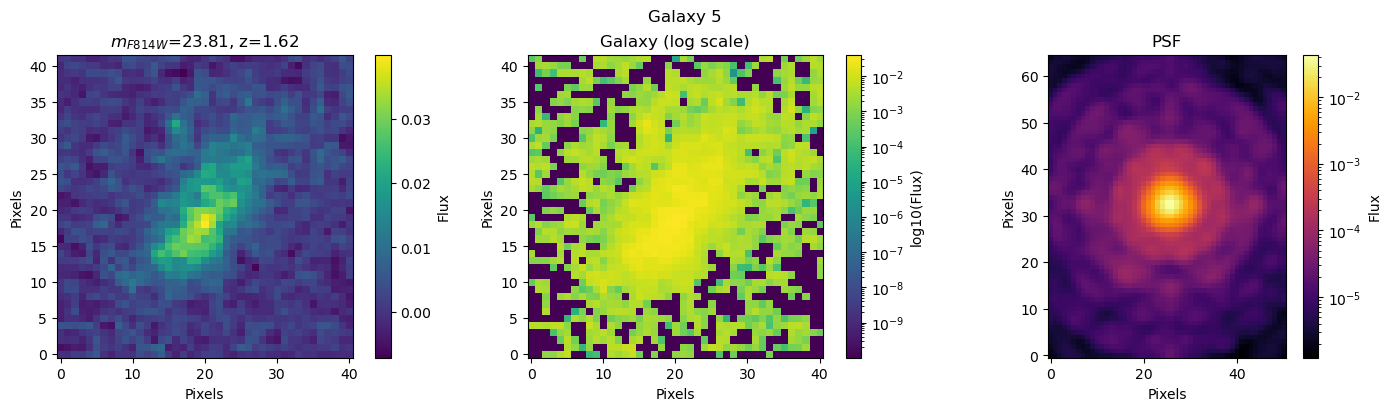

In [26]:
idx = 5
gal_img, psf_img = load_galaxy_image(idx)

_, axes = plt.subplots(1, 3, figsize=(14, 4), constrained_layout=True)
    
im1 = axes[0].imshow(gal_img, origin='lower')
axes[0].set_title(r'$m_{F814W}$=' + f'{main_cat["MAG"][idx]:.2f}, z={fits_cat["zphot"][idx]:.2f}', fontsize=12)
axes[0].set_xlabel('Pixels')
axes[0].set_ylabel('Pixels')
plt.colorbar(im1, ax=axes[0], label='Flux')

gal_positive = np.maximum(gal_img, 1e-10)
im2 = axes[1].imshow(gal_positive, origin='lower', norm=LogNorm())
axes[1].set_title('Galaxy (log scale)')
axes[1].set_xlabel('Pixels')
axes[1].set_ylabel('Pixels')
plt.colorbar(im2, ax=axes[1], label='log10(Flux)')

im3 = axes[2].imshow(psf_img, origin='lower', norm=LogNorm(), cmap='inferno')
axes[2].set_title('PSF')
axes[2].set_xlabel('Pixels')
axes[2].set_ylabel('Pixels')
plt.colorbar(im3, ax=axes[2], label='Flux')

plt.suptitle(f'Galaxy {idx}')
plt.show()